<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных</a></span><ul class="toc-item"><li><span><a href="#Вывел-данные" data-toc-modified-id="Вывел-данные-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывел данные</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Топ-10-городов" data-toc-modified-id="Топ-10-городов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Топ 10 городов</a></span></li><li><span><a href="#Графики" data-toc-modified-id="Графики-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Графики</a></span><ul class="toc-item"><li><span><a href="#График-отношения-модели-самолетов-к-количеству-рейсов" data-toc-modified-id="График-отношения-модели-самолетов-к-количеству-рейсов-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>График отношения модели самолетов к количеству рейсов</a></span></li><li><span><a href="#График-отношения-городов-к-количеству-рейсов" data-toc-modified-id="График-отношения-городов-к-количеству-рейсов-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>График отношения городов к количеству рейсов</a></span></li><li><span><a href="#График-отношения-топ-10-городов-к-количеству-рейсов" data-toc-modified-id="График-отношения-топ-10-городов-к-количеству-рейсов-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>График отношения топ 10 городов к количеству рейсов</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Аналитика в авиакомпании


## Изучение данных

In [1]:
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
df_m=pd.read_csv('/datasets/query_1.csv')
df_c = pd.read_csv('/datasets/query_3.csv')

### Вывел данные 

In [2]:
display(df_m)
df_m.info()
display(df_m.describe().T)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,count,mean,std,min,25%,50%,75%,max
flights_amount,8.0,2035.625,1965.203947,300.0,605.25,795.0,4250.25,4557.0


In [3]:
display(df_c)
df_c.info()
display(df_c.head())
display(df_c.tail())
display(df_c.describe().T)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


,city,average_flights
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935
100,Ярославль,1.322581


,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


Получилось 2 датафрейма. В одном данные о моделях самолетов и количестве рейсов, а во втором города и количество рейсов.
Пропущенных значений нет.

In [4]:
df_c.isna().sum()

city               0
average_flights    0
dtype: int64

In [5]:
df_m.isna().sum()

model             0
flights_amount    0
dtype: int64

Пропусках в двух датафреймах не нашел. 
Типы данных корректны, где название моделей и городов - object, в остальных либо float, либо int

## Исследовательский анализ данных

### Топ 10 городов

In [6]:
df_c_top10 = df_c.sort_values('average_flights',ascending =False).head(10)
df_c_top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Создал таблицу, в которую записал данные топ 10 городов по количество рейсов

### Графики

#### График отношения модели самолетов к количеству рейсов

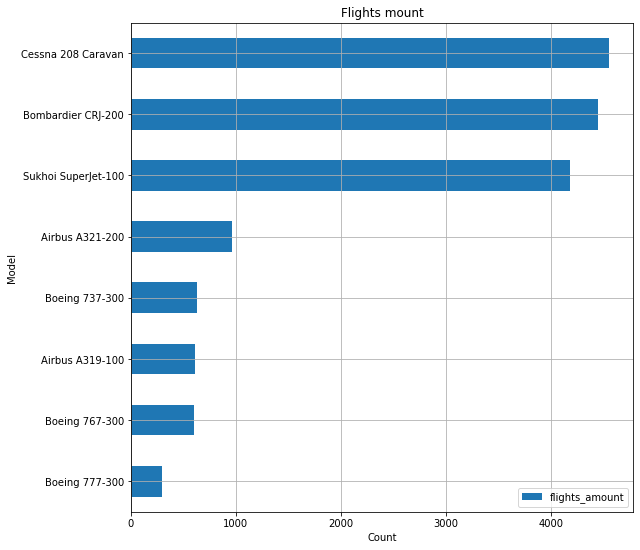

In [7]:
(
    df_m.pivot_table(index='model',values='flights_amount')
    .sort_values('flights_amount')
    .plot(kind='barh',grid=True,figsize=(9,9)))
plt.title('Flights mount')
plt.ylabel('Model')
plt.xlabel('Count')
plt.show()



Как видно из графика, что в первой

Первые три строчки занимают самолеты разных моделей. Так же Есть резки скачок после 4к рейсов. Вохможно количество рейсов зависит от пассажировместимости самолета

#### График отношения городов к количеству рейсов

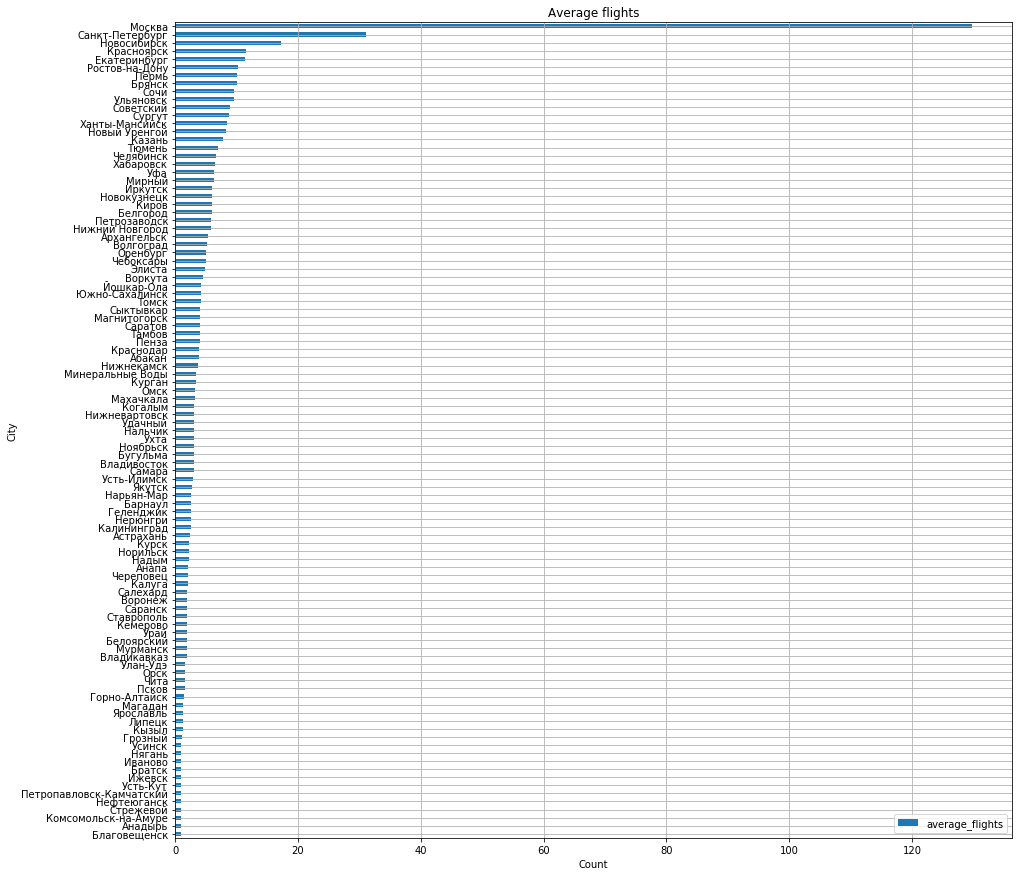

In [8]:
(
    df_c.pivot_table(index='city',values='average_flights')
    .sort_values('average_flights')
    .plot(kind='barh',grid=True,figsize=(15,15))
)
plt.title('Average flights')
plt.ylabel('City')
plt.xlabel('Count')
plt.show()

Из гарфика видно, что самое большое количество рейсов приходится на Москву. Далее за Москвой идет резкий скачок вниз, после Санкт-Петербурга начинается плавный спад.
Может быть связано с количество аэропортов в городе и в наличии международных аэропротов.

#### График отношения топ 10 городов к количеству рейсов

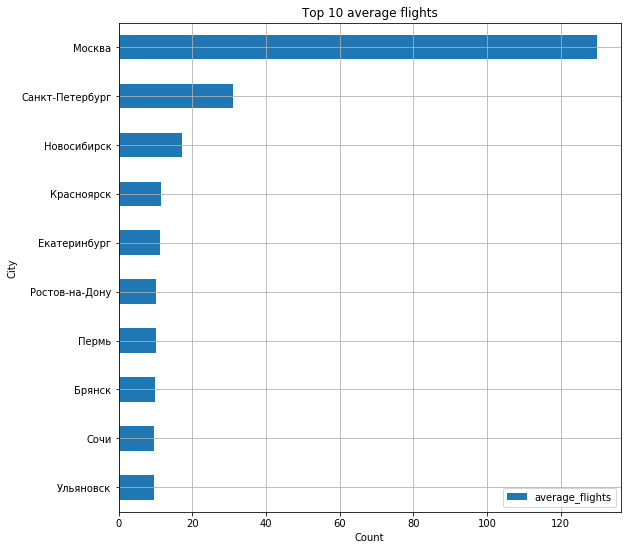

In [9]:

(df_c_top10.pivot_table(index='city',values='average_flights')
     .sort_values('average_flights')
     .plot(kind='barh',grid=True,figsize=(9,9))
)
plt.title('Top 10 average flights')
plt.ylabel('City')
plt.xlabel('Count')
plt.show()

Из графика видно, что Москва лидирует по количеству рейсов почти в 3 раза по сравнению с предыдущих городом.

## Вывод

На входе мы получили 2 датасета: в одном были модели и коилчество рейсов, в другом - города и рейсы.
При проверке на пропуски не нашел пропуски и типы данных оказались корректными.
Создал таблицу, в которую записал топ 10 городов по количеству рейсов.
Построил графики по отношению модели к количеству рейсов. В лидерах оказались модели с маленькой пассажировместимостью, что позволило им совершать более частые перелеты.
Следующий график был отношения городов к количеству рейсов. Тут в лидерах была Москва, так как в Москве много аэропортов, плюс там происходят международные сообщения и часто Москва является пересадочным пунктом между городами.
В графике топ 10 городов к рейсам можно заметить как сильно Москва выбивается из общего вида.